# Metode Numerik untuk Persamaan Non-Linear

In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

Case 1.a Chapter 4

In [2]:
## f(x) = sin(10x) + cos(3x)
## x = [3,6], increment = 0.01
## iterasi selama Er kurang dari 0.5%

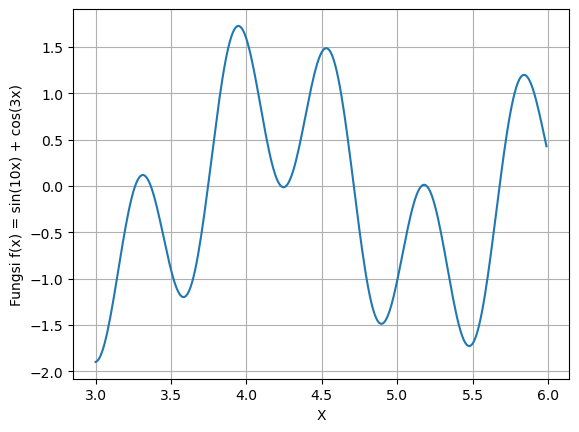

In [3]:
def plot():
    x = np.arange(3, 6, 0.01)
    fx = np.sin(10*x) + np.cos(3*x)
    plt.plot(x, fx)
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Fungsi f(x) = sin(10x) + cos(3x)')
    plt.show()

plot()
    

In [4]:
## a = 3.60, b =3.80
fx1a = lambda x: np.sin(10*x) + np.cos(3*x)

# Bisection Method
In a nutshell:
1. Determine two points in the function: $a$ and $b$
2. Calculate whether $f(a) * f(b) < 0$
3. If step-2 yields true, determine $c = (a+b)/2$
4. If $f(a) * f(c) > 0$ then $a = c$
5. If $f(a) * f(c) < 0$ then $b = c$
4. Repeat step-3 to step-5 while $|c_0 - c_1| > e_r$

In [5]:
er = lambda cc, cp: abs((cc-cp)/cc) * 100 
def bisection(a, b, threshold, fx):

    # calculate initial c0
    c0 = (a+b) / 2

    print("Init: ", a, b, c0)
    print("a\tb\tfx(a)\tfx(b)\tc0\tfx(c0)\tc1\tfx(c1)\ter")

    condition0 = fx(a) * fx(b)
    
    # first iteration outside loop to find c1
    if (condition0 < 0):
        if ((fx(a) * fx(c0)) > 0):
            a = c0
        elif ((fx(a) * fx(c0)) < 0):
            b = c0
        else:
            return b
    
    # calculate c1
    c1 = (a+b) / 2
    
    print(f'{a:.3f}\t{b:.3f}\t{fx(a):.3f}\t{fx(b):.3f}\t{c0:.3f}\t{fx(c0):.3f}\t{c1:.3f}\t{fx(c1):.3f}\t{er(c0, c1):.3f}')

    while(er(c0, c1) > threshold):
        
        # calculate current condition
        condition_current = fx(a) * fx(c1)

        # update either a or b with c1
        if(condition_current > 0):
            a = c1
        elif(condition_current < 0):
            b = c1

        # update c0 with c1
        c0 = c1

        # calculate new c1 using recently updated a and b
        c1 = (a+b) / 2

        print(f'{a:.3f}\t{b:.3f}\t{fx(a):.3f}\t{fx(b):.3f}\t{c0:.3f}\t{fx(c0):.3f}\t{c1:.3f}\t{fx(c1):.3f}\t{er(c0, c1):.3f}')
    
    return c1

In [20]:
uts6 = lambda x: np.power(x, 3) - 4*x + 9
bisection(-3, -2, 1e-6, uts6)

Init:  -3 -2 -2.5
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er
-3.000	-2.500	-6.000	3.375	-2.500	3.375	-2.750	-0.797	10.000
-2.750	-2.500	-0.797	3.375	-2.750	-0.797	-2.625	1.412	4.545
-2.750	-2.625	-0.797	1.412	-2.625	1.412	-2.688	0.339	2.381
-2.750	-2.688	-0.797	0.339	-2.688	0.339	-2.719	-0.221	1.163
-2.719	-2.688	-0.221	0.339	-2.719	-0.221	-2.703	0.061	0.575
-2.719	-2.703	-0.221	0.061	-2.703	0.061	-2.711	-0.079	0.289
-2.711	-2.703	-0.079	0.061	-2.711	-0.079	-2.707	-0.009	0.144
-2.707	-2.703	-0.009	0.061	-2.707	-0.009	-2.705	0.026	0.072
-2.707	-2.705	-0.009	0.026	-2.705	0.026	-2.706	0.009	0.036
-2.707	-2.706	-0.009	0.009	-2.706	0.009	-2.707	-0.000	0.018
-2.707	-2.706	-0.000	0.009	-2.707	-0.000	-2.706	0.004	0.009
-2.707	-2.706	-0.000	0.004	-2.706	0.004	-2.706	0.002	0.005
-2.707	-2.706	-0.000	0.002	-2.706	0.002	-2.706	0.001	0.002
-2.707	-2.706	-0.000	0.001	-2.706	0.001	-2.707	0.000	0.001
-2.707	-2.707	-0.000	0.000	-2.707	0.000	-2.707	0.000	0.001
-2.707	-2.707	-0.000	0.000	-2.707	0.000	-2.707	

-2.706527963280678

In [21]:
uts7 = lambda x: x - np.power(np.e, -x)
bisection(0, 1, 1e-6, uts7)

Init:  0 1 0.5
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er
0.500	1.000	-0.107	0.632	0.500	-0.107	0.750	0.278	50.000
0.500	0.750	-0.107	0.278	0.750	0.278	0.625	0.090	16.667
0.500	0.625	-0.107	0.090	0.625	0.090	0.562	-0.007	10.000
0.562	0.625	-0.007	0.090	0.562	-0.007	0.594	0.041	5.556
0.562	0.594	-0.007	0.041	0.594	0.041	0.578	0.017	2.632
0.562	0.578	-0.007	0.017	0.578	0.017	0.570	0.005	1.351
0.562	0.570	-0.007	0.005	0.570	0.005	0.566	-0.001	0.685
0.566	0.570	-0.001	0.005	0.566	-0.001	0.568	0.002	0.345
0.566	0.568	-0.001	0.002	0.568	0.002	0.567	0.000	0.172
0.566	0.567	-0.001	0.000	0.567	0.000	0.567	-0.000	0.086
0.567	0.567	-0.000	0.000	0.567	-0.000	0.567	-0.000	0.043
0.567	0.567	-0.000	0.000	0.567	-0.000	0.567	0.000	0.022
0.567	0.567	-0.000	0.000	0.567	0.000	0.567	0.000	0.011
0.567	0.567	-0.000	0.000	0.567	0.000	0.567	0.000	0.005
0.567	0.567	-0.000	0.000	0.567	0.000	0.567	0.000	0.003
0.567	0.567	-0.000	0.000	0.567	0.000	0.567	0.000	0.001
0.567	0.567	-0.000	0.000	0.567	0.000	0.567	-0.000	0.00

0.5671432875096798

In [22]:
uts9 = lambda x: np.power(x,3) - x - 11
bisection(2, 3, 1e-4, uts9)

Init:  2 3 2.5
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er
2.000	2.500	-5.000	2.125	2.500	2.125	2.250	-1.859	10.000
2.250	2.500	-1.859	2.125	2.250	-1.859	2.375	0.021	5.556
2.250	2.375	-1.859	0.021	2.375	0.021	2.312	-0.946	2.632
2.312	2.375	-0.946	0.021	2.312	-0.946	2.344	-0.469	1.351
2.344	2.375	-0.469	0.021	2.344	-0.469	2.359	-0.226	0.667
2.359	2.375	-0.226	0.021	2.359	-0.226	2.367	-0.102	0.331
2.367	2.375	-0.102	0.021	2.367	-0.102	2.371	-0.041	0.165
2.371	2.375	-0.041	0.021	2.371	-0.041	2.373	-0.010	0.082
2.373	2.375	-0.010	0.021	2.373	-0.010	2.374	0.006	0.041
2.373	2.374	-0.010	0.006	2.374	0.006	2.374	-0.002	0.021
2.374	2.374	-0.002	0.006	2.374	-0.002	2.374	0.002	0.010
2.374	2.374	-0.002	0.002	2.374	0.002	2.374	0.000	0.005
2.374	2.374	-0.002	0.000	2.374	0.000	2.374	-0.001	0.003
2.374	2.374	-0.001	0.000	2.374	-0.001	2.374	-0.000	0.001
2.374	2.374	-0.000	0.000	2.374	-0.000	2.374	-0.000	0.001
2.374	2.374	-0.000	0.000	2.374	-0.000	2.374	-0.000	0.000
2.374	2.374	-0.000	0.000	2.374	-0.000	2.37

2.3736515045166016

# Regula-Falsi Method
Regula-Falsi is an interpolation-based method to find the roots for an equation.

$$ 
\frac{f_2}{x_3 - x_2} = \frac{f_1 - f_2}{x_2 - x_1}
$$

$$
x_3 = x_2 - f_2\frac{x_2 - x_1}{f_2 - f_1}
$$

## Slide's way:

$$
\frac{f(b) - f(a)}{b - a} = \frac{f(b) - f(x)}{b - x}
$$
$$
\frac{f(b) - f(a)}{b - a} = \frac{f(b) - 0}{b - x}
$$
$$
x = b - f(b) \frac{b - a}{f(b) - f(a)}
$$
In a nutshell:
1. Determine the epsilon
2. Determine $x_1$ and $x_2$
3. Determine $x_3$
4. Find $fx_1$, $fx_2$, and $fx_3$
5. If $fx_1 \times fx_3 > 0$, then $x_1 = x_3$
6. If $fx_1 \times fx_3 < 0$, then $x_2 = x_3$
7. Repeat step 2-6 while $|fx_3|$ > epsilon 

In [6]:
def regula_falsi(a, b, threshold, fx):

    print("Init: ", a, b)
    print("a\tb\tfx(a)\tfx(b)\tc0\tfx(c0)\tc1\tfx(c1)\ter abs(fx(c0))")

    if fx(a) * fx(b) < 0:

        # calculate c0
        c0 = b - (fx(b) * (b - a) / (fx(b) - fx(a)))

        while abs(fx(c0)) > threshold:
            
            # calculate c1, first iteration result is identical with first c0
            c1 = b - (fx(b) * (b - a)/(fx(b) - fx(a)))

            # update a or b with c1
            if fx(a) * fx(c1) > 0:
                a = c1
            elif fx(a) * fx(c1) < 0:
                b = c1
            
            print(f'{a:.3f}\t{b:.3f}\t{fx(a):.3f}\t{fx(b):.3f}\t{c0:.3f}\t{fx(c0):.3f}\t{c1:.3f}\t{fx(c1):.3f}\t{abs(fx(c0)):.3f}')

            # update c0 with c1
            c0 = c1
            
        return c1
    
fxregtest = lambda x: math.e ** x - 5 * x ** 2
print(regula_falsi(0, 1, .00001 ,fxregtest))

Init:  0 1
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er abs(fx(c0))
0.305	1.000	0.892	-2.282	0.305	0.892	0.305	0.892	0.892
0.500	1.000	0.398	-2.282	0.305	0.892	0.500	0.398	0.892
0.574	1.000	0.126	-2.282	0.500	0.398	0.574	0.126	0.398
0.597	1.000	0.036	-2.282	0.574	0.126	0.597	0.036	0.126
0.603	1.000	0.010	-2.282	0.597	0.036	0.603	0.010	0.036
0.605	1.000	0.003	-2.282	0.603	0.010	0.605	0.003	0.010
0.605	1.000	0.001	-2.282	0.605	0.003	0.605	0.001	0.003
0.605	1.000	0.000	-2.282	0.605	0.001	0.605	0.000	0.001
0.605	1.000	0.000	-2.282	0.605	0.000	0.605	0.000	0.000
0.605	1.000	0.000	-2.282	0.605	0.000	0.605	0.000	0.000
0.605	1.000	0.000	-2.282	0.605	0.000	0.605	0.000	0.000
0.6052662264587769


In [24]:
uts10 = lambda x: 3*x + np.sin(x) - np.power(np.e, x)
regula_falsi(0, 1, 1e-4, uts10)

Init:  0 1
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er abs(fx(c0))
0.000	0.471	-1.000	0.265	0.471	0.265	0.471	0.265	0.265
0.000	0.372	-1.000	0.030	0.471	0.265	0.372	0.030	0.265
0.000	0.362	-1.000	0.003	0.372	0.030	0.362	0.003	0.030
0.000	0.361	-1.000	0.000	0.362	0.003	0.361	0.000	0.003
0.000	0.360	-1.000	0.000	0.361	0.000	0.360	0.000	0.000


0.360433076398957

In [7]:
# Code from GitHub
def perbaikan_regula_falsi(fx, a, b):
    
    epsilon = 0.00001
    if fx(a) * fx(b) < 0:

        c_lama = b - (fx(b) * (b-a))/(fx(b) - fx(a))
        while abs(a - b) > epsilon or abs(fx(c_lama)) > epsilon:
            c = b - (fx(b) * (b-a))/(fx(b) - fx(a))

            if abs(fx(c)) < epsilon:
                return c
            
            if fx(a) * fx(c) < 0 :
                b = c
            else:
                a = c
        return c

fx = lambda x: math.e ** x - 5 * x ** 2
print(perbaikan_regula_falsi(fx, 0, 1))

0.6052662264587769


Newton-Raphson Method

# Newton-Raphson Method
Dalam kasus ini, fungsi diuraikan ke dalam deret Taylor.

$$f(x_{r+1}) = f(x_r) + (x_{r+1} - x_r)f'(x_r)$$
$$x_{r+1} = x_r - \frac{f(x_r)}{f'(x_r)}$$

### Terdapat beberapa _stop condition_:
1. $|x_{r+1} - x_r| < \epsilon$
2. $|\frac{x_{r+1}-x_r}{x_{r+1}}| < \delta$
3. Iterasi mencapai nilai maksimum yang ditentukan

$x_{r+1}$ diasumsikan memiliki $f(x_{r+1}) = 0$. Sehingga, dengan menarik garis lurus antara $f(x_{r+1})$ dan $f(x_r)$, akan didapat garis lurus dengan gradien yang sesuai pada titik $x_r$.

In [8]:
def next(x0, fx, fprimex):
    return x0 - (fx(x0) / fprimex(x0))

In [9]:
def newton_raphson(init_guess, fx, fprimex, max_iteration, threshold):
    
    next = lambda x0, fx, fprimex: x0 - (fx(x0) / fprimex(x0))
    x0 = init_guess

    print("Init: ", x0, "Max-Iter: ", max_iteration, "Threshold: ", threshold)
    print("i\tx0\tfx(0)\tf'x(x0)\tx1\ter")

    for i in range(max_iteration):

        # calculate value for initial guess
        fx0 = fx(x0)

        # calculate value for f'(x0)
        fprimex0 = fprimex(x0)

        # calculate next point, x1
        x1 = next(x0, fx, fprimex)

        # return x1 if less than threshold
        if abs(x0 - x1) < threshold:
            return x1
        
        print(f'{i}\t{x0:.3f}\t{fx0:.3f}\t{fprimex0:.3f}\t{x1:.3f}\t{abs(x0-x1):.3f}')
        
        # update x0 to x1
        x0 = x1


In [10]:
fxnewttest = lambda x: np.power(np.e, x) - 5 * np.power(x, 2)
fxnewttestprime = lambda x: np.power(np.e, x) - 10 * x

res = newton_raphson(1, fxnewttest, fxnewttestprime, 5, 1e-5)
print(res)

Init:  1 Max-Iter:  5 Threshold:  1e-05
i	x0	fx(0)	f'x(x0)	x1	er
0	1.000	-2.282	-7.282	0.687	0.313
1	0.687	-0.370	-4.879	0.611	0.076
2	0.611	-0.023	-4.266	0.605	0.005
3	0.605	-0.000	-4.221	0.605	0.000
0.6052671213146185


In [25]:
uts12 = lambda x : np.power(x, 2) - 2
uts12prime = lambda x : 2*x
newton_raphson(-1, uts12, uts12prime, 10, 1e-6)

Init:  -1 Max-Iter:  10 Threshold:  1e-06
i	x0	fx(0)	f'x(x0)	x1	er
0	-1.000	-1.000	-2.000	-1.500	0.500
1	-1.500	0.250	-3.000	-1.417	0.083
2	-1.417	0.007	-2.833	-1.414	0.002
3	-1.414	0.000	-2.828	-1.414	0.000


-1.4142135623730951

# Secant Method
The cons of using Newton-Raphson method is that we need to find the derivative of the function, which may be hard to calculate. Using Secant method, we can use the definition of derivative to calculate the gradient in any given point along the x-axis.

$$
f'(x) = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}
$$
$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$
$$
x_{k+1} = x_k - f(x_k) \frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}
$$

From the above formula, we can calculate the difference between $x_{k+1}$ and $x_k$:
$$
\text{diff} = |f(x_k) \frac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})}|
$$


In [11]:
def gradient(fx, x, h = 1e-6):
    return((fx(x+h) - fx(x))/h)

In [12]:
def secant(a, b, threshold, fx, max_iter=20):
    
    diff = lambda a, b, fx: fx(b) * (b-a) / (fx(b) - fx(a))
    next = lambda a, b, fx: b - (fx(b) * (b-a) / (fx(b) - fx(a))) 

    i = 1
    er = abs(diff(a, b, fx))

    print('i\ta\tb\tfx(a)\tfx(b)\ter')

    while (er >= threshold) & (i <= max_iter):

        print(f'{i:d}\t{a:.3f}\t{b:.3f}\t{fx(a):.3f}\t{fx(b):.3f}\t{er:.3f}')
        
        # calculate next b value
        next_b = next(a, b, fx)

        # update a and b values
        a = b
        b = next_b

        # calculate error using recently updated a and b
        er = abs(diff(a, b, fx))

        i+=1
    
    return b

In [13]:
fxsectest = lambda x: np.power(np.e, x) - 5 * np.power(x, 2)
threshold = 1e-5
a = 0.5
b = 1

secant(a, b, threshold, fxsectest, 10)

i	a	b	fx(a)	fx(b)	er
1	0.500	1.000	0.399	-2.282	0.426
2	1.000	0.574	-2.282	0.126	0.022
3	0.574	0.597	0.126	0.036	0.009
4	0.597	0.606	0.036	-0.001	0.000


0.6052649044313907

In [26]:
uts14 = lambda x : np.power(x, 2) - 4 * x + 4
secant(2.5, 3, 1e-5, uts14, 10)

i	a	b	fx(a)	fx(b)	er
1	2.500	3.000	0.250	1.000	0.667
2	3.000	2.333	1.000	0.111	0.083
3	2.333	2.250	0.111	0.062	0.107
4	2.250	2.143	0.062	0.020	0.052
5	2.143	2.091	0.020	0.008	0.035
6	2.091	2.056	0.008	0.003	0.021
7	2.056	2.034	0.003	0.001	0.013
8	2.034	2.021	0.001	0.000	0.008
9	2.021	2.013	0.000	0.000	0.005
10	2.013	2.008	0.000	0.000	0.003


2.005025125628137

LK02

1. Solve for $x^2e^{-x/2} - 1 = 0$ for [0, 2] interval using bisection.
2. Solve for $x^3 - 5x + 1 = 0$ for (0, 1) with 4 iterations using secant.

In [14]:
# soal 1

lk02_1 = lambda x : np.power(x, 2) * np.power(np.e, -(x/2)) - 1
a_1 = 0; b_1 = 2
answer_lk02_1 = bisection(a_1, b_1, 1e-5, lk02_1)

print(f'\nAkar persamaan: {answer_lk02_1:.3f}')

Init:  0 2 1.0
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er
1.000	2.000	-0.393	0.472	1.000	-0.393	1.500	0.063	50.000
1.000	1.500	-0.393	0.063	1.500	0.063	1.250	-0.164	16.667
1.250	1.500	-0.164	0.063	1.250	-0.164	1.375	-0.049	10.000
1.375	1.500	-0.049	0.063	1.375	-0.049	1.438	0.007	4.545
1.375	1.438	-0.049	0.007	1.438	0.007	1.406	-0.021	2.174
1.406	1.438	-0.021	0.007	1.406	-0.021	1.422	-0.007	1.111
1.422	1.438	-0.007	0.007	1.422	-0.007	1.430	0.000	0.549
1.422	1.430	-0.007	0.000	1.430	0.000	1.426	-0.003	0.273
1.426	1.430	-0.003	0.000	1.426	-0.003	1.428	-0.002	0.137
1.428	1.430	-0.002	0.000	1.428	-0.002	1.429	-0.001	0.068
1.429	1.430	-0.001	0.000	1.429	-0.001	1.429	-0.000	0.034
1.429	1.430	-0.000	0.000	1.429	-0.000	1.429	-0.000	0.017
1.429	1.430	-0.000	0.000	1.429	-0.000	1.430	-0.000	0.009
1.430	1.430	-0.000	0.000	1.430	-0.000	1.430	0.000	0.004
1.430	1.430	-0.000	0.000	1.430	0.000	1.430	-0.000	0.002
1.430	1.430	-0.000	0.000	1.430	-0.000	1.430	-0.000	0.001
1.430	1.430	-0.000	0.000	1.430	-0.000	1

In [15]:
# soal 2
lk02_2 = lambda x: np.power(x, 3) - 5 * x + 1
a_2 = 0
b_2 = 1
answer_lk02_2  = secant(a_2, b_2, 1e-5, lk02_2, 4)
print(f'\nAkar persamaan: {answer_lk02_2:.3f}')

i	a	b	fx(a)	fx(b)	er
1	0.000	1.000	1.000	-3.000	0.750
2	1.000	0.250	-3.000	-0.234	0.064
3	0.250	0.186	-0.234	0.074	0.015
4	0.186	0.202	0.074	-0.000	0.000

Akar persamaan: 0.202


DAA

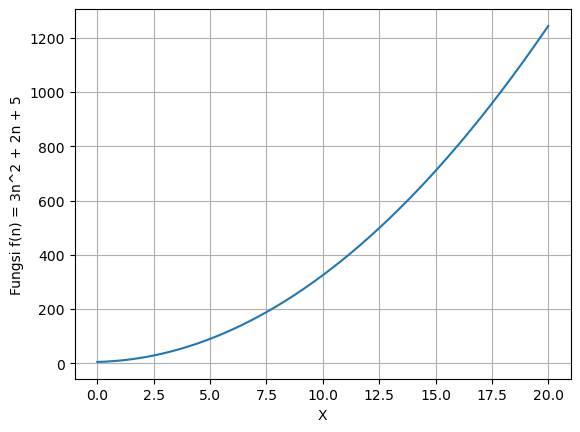

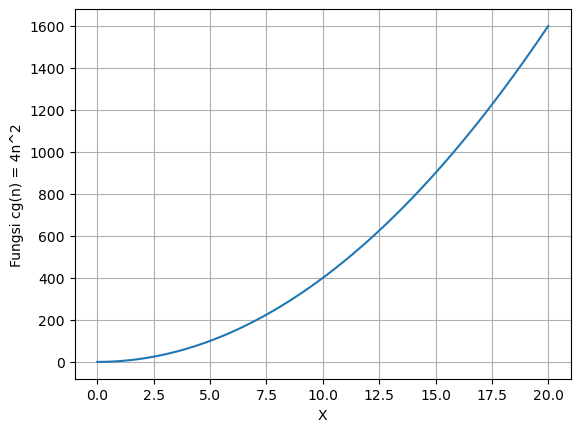

In [16]:
def plotfn():
    x = np.arange(0, 20, .01)
    fx = 3 * np.power(x, 2) + 2 * x + 5
    plt.plot(x, fx)
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Fungsi f(n) = 3n^2 + 2n + 5')
    plt.show()

def plotcgn():
    x = np.arange(0, 20, .01)
    fgn = 4 * np.power(x, 2)
    plt.plot(x, fgn)
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Fungsi cg(n) = 4n^2')
    plt.show()

plotfn()
plotcgn()

In [17]:
fndaa = lambda x: 7 * np.power(x,2) - 2 * x - 5
print(bisection(0, 8, .01, fndaa))

Init:  0 8 4.0
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er
0.000	4.000	-5.000	99.000	4.000	99.000	2.000	19.000	50.000
0.000	2.000	-5.000	19.000	2.000	19.000	1.000	0.000	50.000
0.000	2.000	-5.000	19.000	1.000	0.000	1.000	0.000	0.000
1.0


In [18]:
fadaa = lambda x: 0.25 * np.power(x, 2) - 5 * x + 2
print(bisection(10, 100, .001, fadaa))


Init:  10 100 55.0
a	b	fx(a)	fx(b)	c0	fx(c0)	c1	fx(c1)	er
10.000	55.000	-23.000	483.250	55.000	483.250	32.500	103.562	40.909
10.000	32.500	-23.000	103.562	32.500	103.562	21.250	8.641	34.615
10.000	21.250	-23.000	8.641	21.250	8.641	15.625	-15.090	26.471
15.625	21.250	-15.090	8.641	15.625	-15.090	18.438	-5.202	18.000
18.438	21.250	-5.202	8.641	18.438	-5.202	19.844	1.225	7.627
18.438	19.844	-5.202	1.225	19.844	1.225	19.141	-2.112	3.543
19.141	19.844	-2.112	1.225	19.141	-2.112	19.492	-0.475	1.837
19.492	19.844	-0.475	1.225	19.492	-0.475	19.668	0.367	0.902
19.492	19.668	-0.475	0.367	19.668	0.367	19.580	-0.056	0.447
19.580	19.668	-0.056	0.367	19.580	-0.056	19.624	0.155	0.224
19.580	19.624	-0.056	0.155	19.624	0.155	19.602	0.050	0.112
19.580	19.602	-0.056	0.050	19.602	0.050	19.591	-0.003	0.056
19.591	19.602	-0.003	0.050	19.591	-0.003	19.597	0.023	0.028
19.591	19.597	-0.003	0.023	19.597	0.023	19.594	0.010	0.014
19.591	19.594	-0.003	0.010	19.594	0.010	19.592	0.004	0.007
19.591	19.592	-0.003	0.00

In [19]:
print(secant(10, 100, .01, fadaa, ))

i	a	b	fx(a)	fx(b)	er
1	10.000	100.000	-23.000	2002.000	88.978
2	100.000	11.022	2002.000	-22.739	0.999
3	11.022	12.021	-22.739	-21.978	28.884
4	12.021	40.905	-21.978	215.783	26.214
5	40.905	14.691	215.783	-17.498	1.966
6	14.691	16.658	-17.498	-11.919	4.201
7	16.658	20.858	-11.919	6.477	1.479
8	20.858	19.379	6.477	-1.006	0.199
9	19.379	19.578	-1.006	-0.064	0.013
19.591811716343877
